In [1]:
%pylab nbagg
%load_ext autoreload

%autoreload 2

Populating the interactive namespace from numpy and matplotlib


### Now what would fastCat think of this?

#### We can loop through this

This runs off of a modified xpecgen that returns only the doses and 

In [35]:
import sys
import os
import tigre
from scipy.signal import fftconvolve

sys.path.insert(0,'../xpecgen')

import xpecgen as xg

dose = 1

# phan_map_hard =  ['air','water','Spongiosa_Bone_ICRP','G4_BONE_COMPACT_ICRU',
#              'G4_BONE_CORTICAL_ICRP','C4_Vertebra_ICRP','D6_Vertebra_ICRP','G4_B-100_BONE']

phan_map_hard =  ['air','water','water','water',
             'water','water','water','water']

spectrum_files = ['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25']

dets = ['CWO-784-micrometer']#,'CuGOS_lowres']

phan_maps = [phan_map_hard]#,phan_map_soft]

angles = np.linspace(0,2*np.pi,2)

res = []

original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])


angles = np.linspace(0,2*pi,2)

geo = 'catphan_low_contrast_512'

phantom = xg.Catphan_515()

for phan_map in phan_maps:
    for spectrum_file in spectrum_files:
        for det in dets:
            s = xg.Spectrum()
            s.load(spectrum_file)

            kernel = xg.Kernel(s, det)
            
#             kernel.add_focal_spot(0.1)

            energy_deposition_file = os.path.join(
                xg.data_path, "Detectors", det, 'EnergyDeposition.npy')
            energies = s.x
            fluence = s.y
            deposition_efficiency_file = energy_deposition_file

            res.append(xg.return_projs(phantom.phantom,kernel,
                                       energies,fluence,angles,phantom.geomet,
                                       deposition_efficiency_file=deposition_efficiency_file
                                       ,phantom_mapping = phan_map,
                                       nphoton=None,
                                      dose=dose))

#             img_xg = tigre.algorithms.FDK(
#                 np.transpose(np.array(projs_xg[0]),[0,2,1]), phantom.geomet,angles)

#             res.append([[phan_map,spectrum_file,det],phantom.analyse_515(img_xg[5])])

In [5]:
# np.save('doses_corresponding_to_energies_6',res[0][0])
doses.shape

(2, 64, 512)

## Failed attempt

In [147]:
mu_en=[
1.00000E-03,4.078E+03,4.065E+03,
1.50000E-03,1.376E+03,1.372E+03,
2.00000E-03,6.173E+02,6.152E+02,
3.00000E-03,1.929E+02,1.917E+02,
4.00000E-03,8.278E+01,8.191E+01,
5.00000E-03,4.258E+01,4.188E+01,
6.00000E-03,2.464E+01,2.405E+01,
8.00000E-03,1.037E+01,9.915E+00,
1.00000E-02,5.329E+00,4.944E+00,
1.50000E-02,1.673E+00,1.374E+00,
2.00000E-02,8.096E-01,5.503E-01,
3.00000E-02,3.756E-01,1.557E-01,
4.00000E-02,2.683E-01,6.947E-02,
5.00000E-02,2.269E-01,4.223E-02,
6.00000E-02,2.059E-01,3.190E-02,
8.00000E-02,1.837E-01,2.597E-02,
1.00000E-01,1.707E-01,2.546E-02,
1.50000E-01,1.505E-01,2.764E-02,
2.00000E-01,1.370E-01,2.967E-02,
3.00000E-01,1.186E-01,3.192E-02,
4.00000E-01,1.061E-01,3.279E-02,
5.00000E-01,9.687E-02,3.299E-02,
6.00000E-01,8.956E-02,3.284E-02,
8.00000E-01,7.865E-02,3.206E-02,
1.00000E+00,7.072E-02,3.103E-02,
1.25000E+00,6.323E-02,2.965E-02,
1.50000E+00,5.754E-02,2.833E-02,
2.00000E+00,4.942E-02,2.608E-02,
3.00000E+00,3.969E-02,2.281E-02,
4.00000E+00,3.403E-02,2.066E-02,
5.00000E+00,3.031E-02,1.915E-02,
6.00000E+00,2.770E-02,1.806E-02,
8.00000E+00,2.429E-02,1.658E-02,
1.00000E+01,2.219E-02,1.566E-02,
1.50000E+01,1.941E-02,1.441E-02,
2.00000E+01,1.813E-02,1.382E-02]

mu_energies = mu_en[::3]
mu_en_vals = mu_en[2::3]

<IPython.core.display.Javascript object>


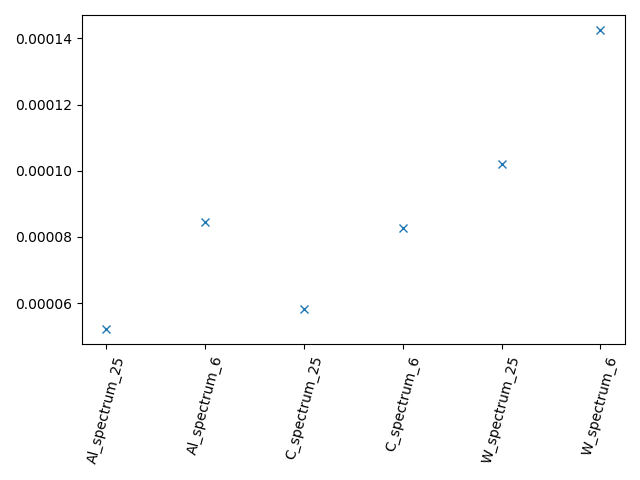

Al_spectrum_25
Al_spectrum_6
6 Al_spectrum_6
C_spectrum_25
C_spectrum_6
6 C_spectrum_6
W_spectrum_25
W_spectrum_6
6 W_spectrum_6


In [253]:
spectrum_files = sorted(['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25'])

plt.figure()

# doses = res[0][0]
doses_fc = []

for jj,spectrum_file in enumerate(spectrum_files):
    
    print(spectrum_file)
    energies = []
    fluence = []

    with open(os.path.join(xg.data_path, "MV_spectra", f'{spectrum_file}.txt')) as f:
        for line in f:
            energies.append(float(line.split()[0]))
            fluence.append(float(line.split()[1]))

    # These are what I used in the Monte Carlo
    original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

#     mu_en_water = np.array([0.1557, 0.06947,0.04223,0.03190,0.03800,0.02597,0.02554, 0.02546,0.03192,0.03299,0.03244,0.03150,0.03103,0.02608,0.02066,0.01806])

    # Loading the file from the monte carlo
    deposition_summed = np.load(deposition_efficiency_file,allow_pickle=True)

    # This is a scaling factor that I found to work to convert energy deposition to photon probability eta
    deposition_summed = deposition_summed[0]/(original_energies_keV*355)


    # Binning to get the fluence per energy
    large_energies = np.linspace(0,6000,6001)/1000 #keV
    fluence_large = np.interp(large_energies,np.array(energies), fluence)

    fluence_small = np.zeros(len(original_energies_keV))
    
    mu_en_f = xg.log_interp_1d(mu_energies,mu_en_vals)
    
    mu_en_water = [mu_en_f(energy) for energy in energies]

#     # Still binning
#     for ii, val in enumerate(large_energies):

#         index = np.argmin(np.abs(original_energies_keV-val*1000))
#         fluence_small[index] += fluence_large[ii] 

#     # Normalize
#     fluence_small /= np.sum(fluence_small)

    if np.max(energies) > 3:
        
        doses = np.load('doses_corresponding_to_energies_6.npy')
        print('6',spectrum_file)
    else:
        doses = np.load('doses_corresponding_to_energies_25.npy')

    fluence_small = fluence/np.sum(fluence)

    # Sum over the image dimesions to get the energy intensity and multiply by fluence
    dose_divided_by_initial_intensity = doses@(fluence_small*mu_en_water*0.997)
    
    #plt.plot(jj,doses@(fluence_small*mu_en_water),'x')

    # Mass of the phantom there is a times 4 since the detector is 1/4 the size 1000 for mg
    dose_in_mgrays = dose_divided_by_initial_intensity*1.6021766e-13/2.0106*4*1000
    # Scale by the amount of photons hitting the detector
    
    doses_fc.append(dose_in_mgrays)

plt.plot(doses_fc,'x')    
plt.xticks(ticks=range(len(spectrum_files)),labels=spectrum_files,rotation=75)
plt.tight_layout()

## Working attempt

In [5]:
# plt.figure()
# plt.plot(res[0][0]/original_energies_keV,'x')
# plt.figure()
# plt.loglog(original_energies_keV,mu_en_water,'x')

In [6]:
# mu_en_f = xg.log_interp_1d(mu_energies,mu_en[1::3],'cubic')

# mu_water = [mu_en_f(energy) for energy in original_energies_keV/1000]

In [7]:
# np.round(mu_water,6)

<IPython.core.display.Javascript object>


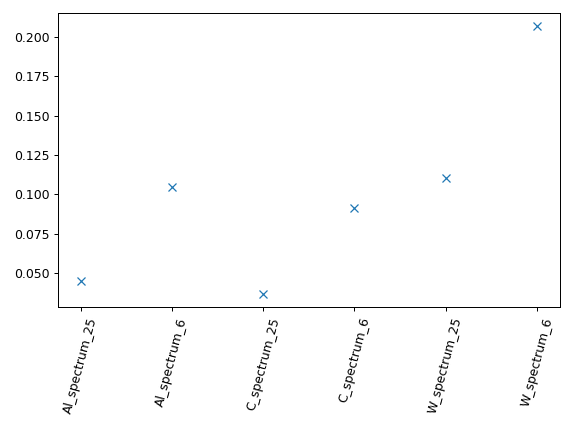

0.021328344994554917
Al_spectrum_25 2.38592568282434e-13 1.5636402554957593e-07
0.021328344994554917
Al_spectrum_6 1.0306131650056878e-13 6.754226438181276e-08
0.02132834499455492
C_spectrum_25 2.9470084699573786e-13 1.9313514708712675e-07
0.02132834499455492
C_spectrum_6 1.1790097274439077e-13 7.726758149776393e-08
0.021328344994554917
W_spectrum_25 9.744617048952957e-14 6.38623222920181e-08
0.02132834499455492
W_spectrum_6 5.1960162711714054e-14 3.4052612234748924e-08


In [215]:
spectrum_files = sorted(['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25'])

plt.figure()

doses = res[0][0]
doses_fc = []

# Loading the file from the monte carlo
deposition = np.load(deposition_efficiency_file,allow_pickle=True)

for jj,spectrum_file in enumerate(spectrum_files):
    
    s = xg.Spectrum()
    s.load(spectrum_file)

    kernel = xg.Kernel(s, det)

    energy_deposition_file = os.path.join(
        xg.data_path, "Detectors", det, 'EnergyDeposition.npy')
    energies = s.x
    fluence = s.y

    # These are what I used in the Monte Carlo
    original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

    mu_en_water = array([0.1557  , 0.06947 , 0.04223 , 0.0319  , 0.027678, 0.02597 ,
       0.025434, 0.02546 , 0.03192 , 0.03299 , 0.032501, 0.031562,
       0.03103 , 0.02608 , 0.02066 , 0.01806 ])

    mu_water = np.array([0.3756  , 0.2683  , 0.2269  , 0.2059  , 0.19289 , 0.1837  ,
       0.176564, 0.1707  , 0.1186  , 0.09687 , 0.083614, 0.074411,
       0.07072 , 0.04942 , 0.03403 , 0.0277  ])
    
    mu_woutcoherent_water = np.array([3.286E-01  , 2.395E-01   , 2.076E-01 , 1.920E-01  , 1.824E-01 , 1.755E-01  ,
        1.700E-01, 1.654E-01 , 1.180E-01 , 9.665E-02 , 8.351E-02, 7.434E-02,
        7.066E-02 , 4.940E-02 , 0.03402 , 0.0277  ])

    # This is a scaling factor that I found to work to convert energy deposition to photon probability eta
    deposition_summed = deposition[0]/(original_energies_keV/1000)/1000000

    
    fluence_norm = fluence/np.sum(fluence)
    
    deposition_long = np.interp(energies,original_energies_keV/1000,deposition_summed)
    
    nphotons_at_energy = fluence_norm*deposition_long
    
    nphotons_av = np.sum(nphotons_at_energy)
    
    print(nphotons_av)

#     deposition_scale = np.trapz(fluence_original*deposition_summed,original_energies_keV)
    
    # Binning to get the fluence per energy
    large_energies = np.linspace(0,6000,3001) #keV
    fluence_large = np.interp(large_energies,np.array(energies), fluence)

    fluence_small = np.zeros(len(original_energies_keV))
    
    inds = []
    # Still binning
    for ii, val in enumerate(large_energies):

        index = np.argmin(np.abs(original_energies_keV-val))
        fluence_small[index] += fluence_large[ii] 
        inds.append(index)

    # Normalize
    fluence_small /= np.sum(fluence_small)

    # Sum over the image dimesions to get the energy intensity and multiply by fluence
    dose_divided_by_initial_intensity = (doses/1000)@((fluence_small))
    

    #plt.plot(jj,doses@(fluence_small*mu_en_water),'x')

    # Mass of the phantom there is a times 4 since the detector is 1/4 the size 1000 for mg
    dose_in_mgrays = dose_divided_by_initial_intensity #* 1.6021766e-16 * 1000
    # Scale by the amount of photons hitting the detector
    
    nphotons = 3.304057543118688e-07/dose_in_mgrays
    # This should adjust to the number that reach the detector
    nphotons *= nphotons_av # Nope
    # We then divide by the number of pixels to get the final product
    nphotons_per_voxel = nphotons/(10*128*phantom.phantom.shape[2])  
    
    print(spectrum_file,nphotons_per_voxel,nphotons)
    doses_fc.append(dose_in_mgrays)

plt.plot(doses_fc,'x')    
plt.xticks(ticks=range(len(spectrum_files)),labels=spectrum_files,rotation=75)
plt.tight_layout()

In [216]:
mu_en_water/mu_water*

SyntaxError: invalid syntax (<ipython-input-216-5a752cf18759>, line 1)

<IPython.core.display.Javascript object>


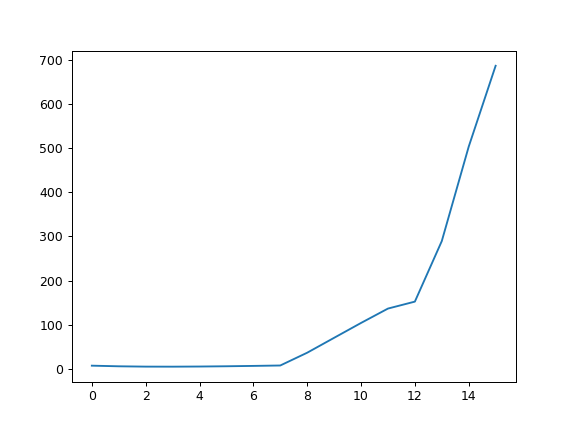

In [217]:
plt.figure();plot(doses)

In [218]:
large_energies

array([0.000e+00, 2.000e+00, 4.000e+00, ..., 5.996e+03, 5.998e+03,
       6.000e+03])

<IPython.core.display.Javascript object>


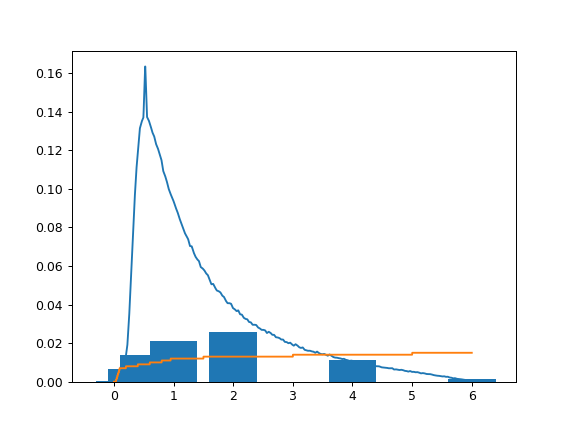

In [219]:
figure();plot(large_energies/1000,100*fluence_large/sum(fluence_large));bar(original_energies_keV/1000,fluence_small/10);plot(large_energies/1000,np.array(inds)/1000)

In [220]:
doses/doses2

ValueError: operands could not be broadcast together with shapes (16,) (6,) 

In [221]:
doses = np.array([
1.613708349168519e-07,
1.313530049174005e-07,
6.200432949299284e-07,
3.304057543118688e-07,
2.999242099122057e-07,
3.515523019359534e-07,
])

names = np.array([
'Dose_Al_spectrum_25'  ,
'Dose_C_spectrum_25'  ,
'Dose_W_spectrum_6',
'Dose_Al_spectrum_6'  , 
'Dose_C_spectrum_6',
'Dose_W_spectrum_25'])

# doses = np.array([
# 1.342093192135962e-08,
# 2.736387827440012e-08,
# 1.096097257402562e-08,
# 2.485867334200975e-08,
# 2.91604074220686e-08,
# 5.120586976659069e-08])
# names = np.array([
# 'Dose_Al_spectrum_25topas',
# 'Dose_Al_spectrum_6topas',
# 'Dose_C_spectrum_25topas',
# 'Dose_C_spectrum_6topas',
# 'Dose_W_spectrum_25topas',
# 'Dose_W_spectrum_6topas'])

indeces = np.argsort(names)


names = names[indeces]
doses = doses[indeces]

indeces = np.argsort(doses)

names = names[indeces]
doses = doses[indeces]


<IPython.core.display.Javascript object>


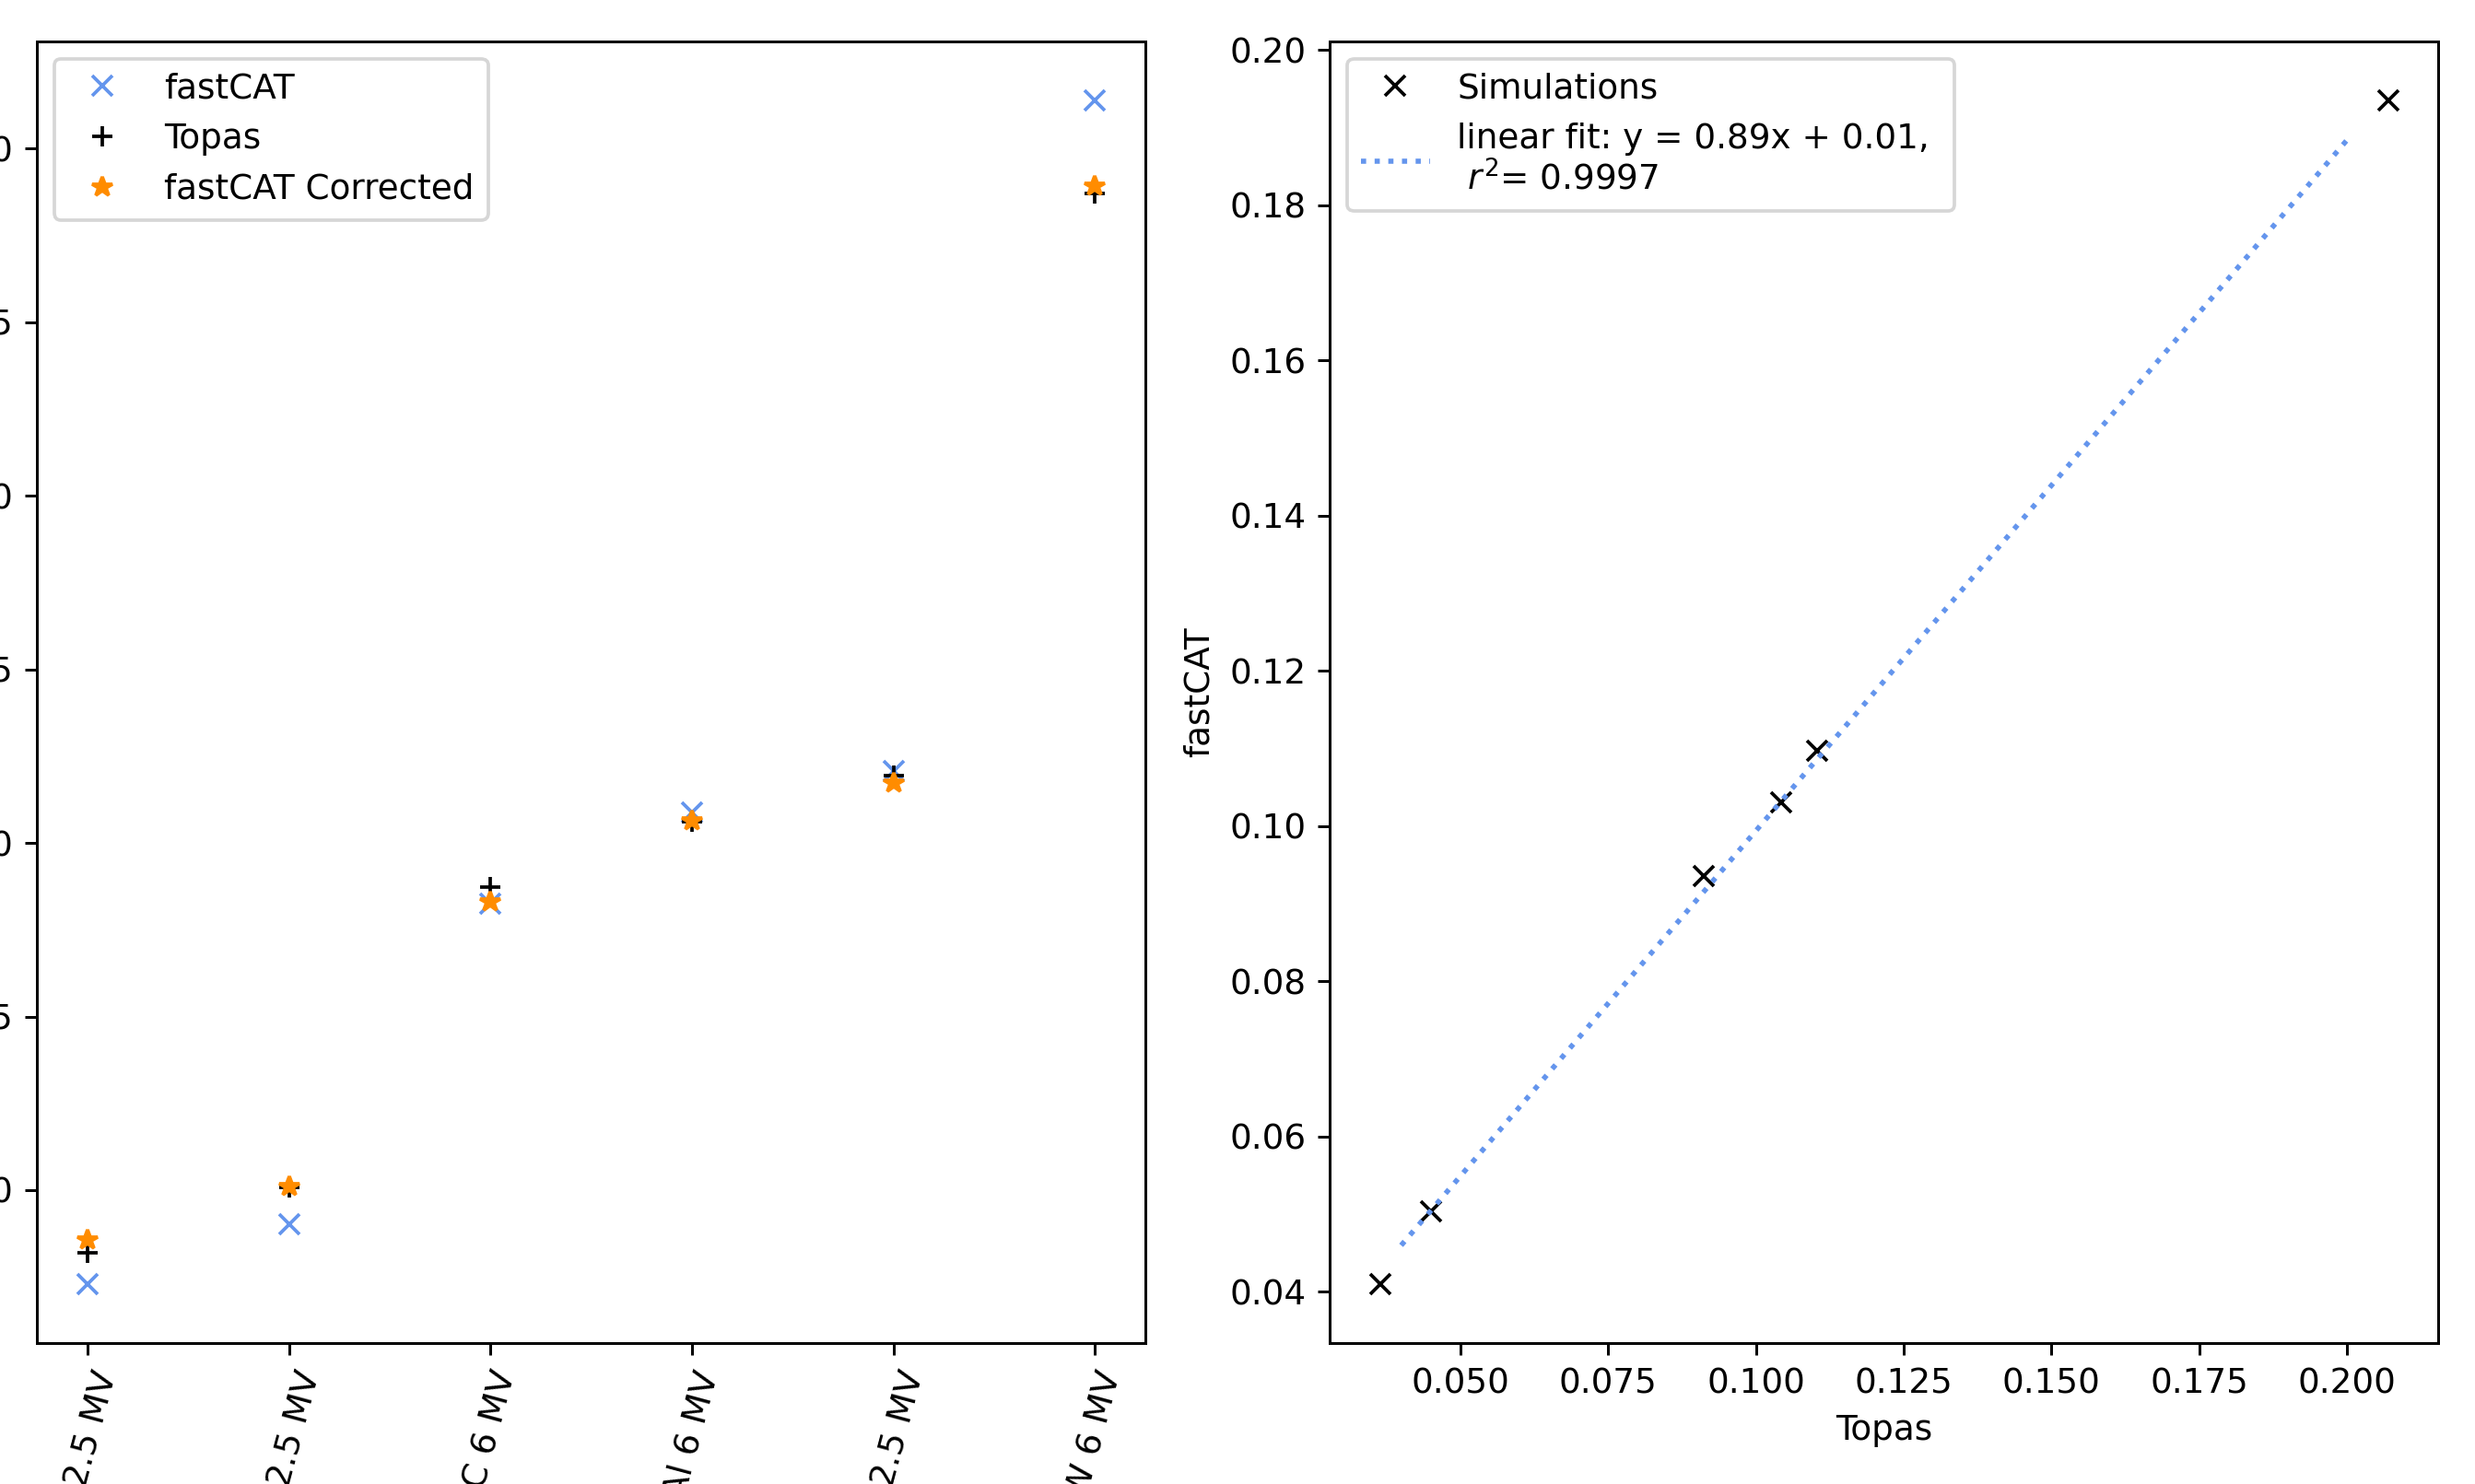

In [255]:
import pandas as pd
import scipy as sp

d_norm = doses#/sum(doses)

doses_fc2 = np.array(doses_fc)
doses_fc2 = doses_fc2[indeces]#/(5*7.5)#(doses_fc2[indeces]-np.min(doses_fc2))
# doses_fc2 = doses_fc2/np.max(doses_fc2)*np.max(d_norm)
# doses_fc2 += np.min(d_norm)

# doses_fc2 = np.delete(doses_fc2,4)
# d_norm = np.delete(d_norm,4)

shorts = ['C 2.5 MV', 'Al 2.5 MV', 'C 6 MV',
       'Al 6 MV', 'W 2.5 MV', 'W 6 MV']
dat = pd.DataFrame(d_norm/20000000/(1.6021766e-16 * 1000),index=shorts)#np.delete(names,4))

plt.figure(figsize=[10,6],dpi=300)

plt.subplot(122)
plt.plot(doses_fc2,d_norm/20000000/(1.6021766e-16 * 1000),'kx')

pp = np.polyfit(doses_fc2,d_norm/20000000/(1.6021766e-16 * 1000),1)
xx = np.linspace(0.040,0.2,100)
yy = np.polyval(pp,xx)
plt.plot(xx,yy,':',color='cornflowerblue')
plt.ylabel('fastCAT')
plt.xlabel('Topas')

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(doses_fc2,d_norm/20000000/(1.6021766e-16 * 1000),)
plt.legend(['Simulations',f'linear fit: y = {np.round(pp[0],3)}x + {np.round(pp[1],3)}, \n $r^2$= {np.round(r_value,4)}'])
plt.tight_layout()

plt.subplot(121)
plt.plot(doses_fc2,'x',color='cornflowerblue')
plt.plot(dat,'k+')
plt.plot(doses_fc2*pp[0] + pp[1],'*',color='darkorange')
# plt.plot(doses_fc/sum(doses_fc),'x')
plt.xticks(rotation=75)
plt.ylabel('MeV/photon')
plt.legend(['fastCAT','Topas','fastCAT Corrected'])


In [ ]:
plt.savefig('/home/xcite/fastcat_paper/figures/Dose_comparison.pdf')

In [234]:
import scipy as sp

In [ ]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(d_norm/20000000/(1.6021766e-16 * 1000),doses_fc2)

In [237]:
sp.stats.linregress(d_norm/20000000/(1.6021766e-16 * 1000),doses_fc2)

LinregressResult(slope=1.1224913589355823, intercept=-0.011552510019366427, rvalue=0.9996599239511883, pvalue=1.7345791327325216e-07, stderr=0.014640867946012274)

In [214]:
pp

array([ 1.12249136e+00, -1.85091612e-15])

In [394]:
plt.savefig('Dose Comparison Better')

In [175]:
from scipy.optimize import minimize

In [192]:
minimize(min_fun,1000000)

      fun: 4.405434031906478e-15
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1000000.])

In [193]:
def min_fun(x):
    
    return np.sum(np.abs((doses_fc2)*np.exp(-x*doses_fc2/d_norm)-d_norm/20000000))

In [176]:
def min_fun(x):
    
    return np.sum(np.abs(doses_fc2-d_norm/x))

In [108]:
x = 5

np.sum(np.abs(np.array(doses_fc)**x-np.array(doses)/np.sum(doses)))

1.0

In [109]:
min_fun(1.23)

0.7929858306156738

<IPython.core.display.Javascript object>


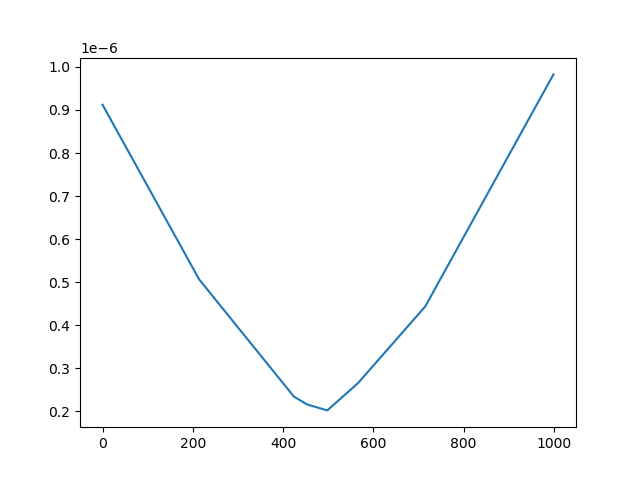

In [89]:
plt.figure()
plt.plot([min_fun(ii) for ii in np.linspace(7.,8.,1000)])

In [111]:
np.linspace(0.1,10,100)[27]

2.8000000000000003

<IPython.core.display.Javascript object>


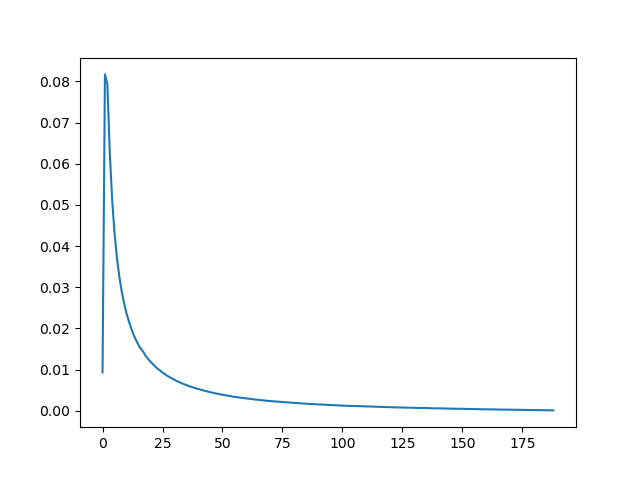

In [93]:
plt.figure()
plt.plot([0.00932948226572424 ,0.08168943504840458 ,0.0794005993790592 ,0.06285985738122206 ,0.05131660250882283 ,0.04306470340452115 ,0.03710835702215279 ,0.032547478314931905 ,0.028977364864434266 ,0.026110862672524826 ,0.02367761037253843 ,0.021682645753916045 ,0.019976514396575686 ,0.018401365564700435 ,0.017120087783548177 ,0.016002370232912604 ,0.015023695670847683 ,0.014328648654309124 ,0.013314373713528045 ,0.012585741434049717 ,0.011913028617366107 ,0.01130765425287674 ,0.010744765246006182 ,0.010220163438886962 ,0.009759205705038607 ,0.009320246318415801 ,0.008889347394898543 ,0.008495728113244429 ,0.008163234010140697 ,0.007874736601488066 ,0.0075387160457756576 ,0.007212267290001085 ,0.00695953818637931 ,0.006720075261618743 ,0.006458446063317929 ,0.006258613748826292 ,0.006025867876653681 ,0.005829226162141324 ,0.005628218363446795 ,0.0054460183119985385 ,0.005303952649763308 ,0.005118897850965171 ,0.004965581125645116 ,0.004789762274155417 ,0.0046419871172204245 ,0.004507478139146643 ,0.00440521101349504 ,0.0042498791723986 ,0.004146100709914709 ,0.004018812563372977 ,0.003903615111489563 ,0.0037932875227324153 ,0.0036990808601863588 ,0.0036226743869983797 ,0.003479433240560257 ,0.0033968134937284213 ,0.0033422374414512936 ,0.0032272079158825783 ,0.0031543278953032753 ,0.00308329506418566 ,0.0030033621383890054 ,0.0029392142861740436 ,0.0028471906657190718 ,0.002784050371392303 ,0.0027173836244568576 ,0.002678760572076121 ,0.0026102466356789887 ,0.002541564772967157 ,0.002482118857563763 ,0.0024129332159078354 ,0.0023756535740446895 ,0.0023417324584755206 ,0.002275401564169473 ,0.002224016111871624 ,0.002172966512203173 ,0.0021336717545636405 ,0.0020797674075453084 ,0.002044838734087947 ,0.002002353376469137 ,0.0019541585241505655 ,0.0019089863454965735 ,0.0018592801563457127 ,0.0018204891776502775 ,0.0017780038200314674 ,0.0017471053781268782 ,0.0017192296098868683 ,0.0016943765153114379 ,0.0016436795609038538 ,0.0016199683652683757 ,0.0015935199707033062 ,0.001563494745635151 ,0.001518792760662316 ,0.0015016642765630329 ,0.001479514795654254 ,0.0014505642990001717 ,0.0014021007645780826 ,0.0013799848689322433 ,0.0013534189259468848 ,0.001326584300858008 ,0.00131603852829492 ,0.0012847034779721136 ,0.001241848682460966 ,0.0012354842751338797 ,0.001187490934392947 ,0.001191302861736611 ,0.0011742919260576171 ,0.001154090390399345 ,0.0011232087411262256 ,0.0011116218254120045 ,0.0010882968603003337 ,0.0010503958910728025 ,0.0010357023385366528 ,0.001009472248180692 ,0.0009918735704002519 ,0.0009875074862180815 ,0.0009667853789842429 ,0.0009519910706592739 ,0.0009320582171045198 ,0.0009179356140383463 ,0.0008955174510260492 ,0.0008843167658356356 ,0.0008603536807281092 ,0.0008381370292934508 ,0.0008251899104301691 ,0.000819631549413637 ,0.0007991445390203767 ,0.0007894719832937228 ,0.000770244420260704 ,0.0007692368623725109 ,0.0007422007257059954 ,0.0007313191005135098 ,0.0007064156280436698 ,0.0006997321607186553 ,0.0006941066291762437 ,0.0006710167609051513 ,0.0006598328683462075 ,0.0006622677999093409 ,0.0006281787580254735 ,0.0006220830328019051 ,0.0006058781434334657 ,0.0005978344729593906 ,0.0005778848267731667 ,0.00057741463309201 ,0.0005607731353053535 ,0.0005385900691336348 ,0.0005337034133758982 ,0.0005329645375912233 ,0.0005051223546141532 ,0.0005045681977756469 ,0.00048623064421053207 ,0.00048602913263289346 ,0.0004673053485439712 ,0.00044962270760618187 ,0.00044466888132256566 ,0.00043230950456073 ,0.00042406432250901633 ,0.00041600385940347126 ,0.0004091020878693484 ,0.00039424060901849977 ,0.0003797821533229284 ,0.00037598701861073436 ,0.00036456802921121234 ,0.00036408104289858566 ,0.00035118430192971364 ,0.0003340894030933703 ,0.00032858141997124787 ,0.0003100087695655546 ,0.0002963899454434775 ,0.00029514729071470605 ,0.0002893034549631859 ,0.0002755670824208196 ,0.0002750297182137833 ,0.000264517530913635 ,0.000246935645764665 ,0.0002452563826176765 ,0.00022989112482273128 ,0.0002242320080173799 ,0.00020708673128662686 ,0.00019887513449785293 ,0.00019449225768421283 ,0.00018092381145654542 ,0.00016960557784584265 ,0.0001644015413533252 ,0.00015095400207224094 ,0.00014360218801472512 ,0.00013753501026465552 ,0.00012536706950157654 ,0.00012026714732417233 ,0.0001049573052130778])